In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install datasets
!pip install -q monai
!pip install patchify

  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\naboth demetrius\appdata\local\temp\pip-req-build-1irpjn9f
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36831 sha256=1d28b82a8309415fa5240f39c62c45223a671a0f9ea1f508c4521140dbe0e73e
  Stored in directory: C:\Users\Naboth Demetrius\AppData\Local\Temp\pip-ephem-wheel-cache-x3j75w4p\wheels\15\d7\bd\05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment-anything


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\Naboth Demetrius\AppData\Local\Temp\pip-req-build-1irpjn9f'

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
faster-whisper 0.10.0 requires tokenizers<0.16,>=0.13, but you have tokenizers 0.19.1 which is incompatible.
optimum-intel 1.16.0.dev0 requires transformers<4.39.0,>=4.36.0, but you have transformers 4.42.0.dev0 which is incompatible.
whisperx 3.1.1 requires pyannote.audio==3.1.0, but you have pyannote-audio 3.0.0 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for patchify from https://files.pythonhosted.org/packages/00/ce/d76647d95aad98d5532b5d25801dedda788c6b5d4c7457d30ae3612132af/patchify-0.2.3-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import cv2
import numpy as np

# Define the paths to your folders
images_folder = r"F:\tooth-cavity-segmentation\data\train"
masks_folder = r"F:\tooth-cavity-segmentation\data\train_mask"

# Initialize empty lists to store image and mask arrays
image_arrays = []
mask_arrays = []

# Loop through all files in the images folder
for filename in os.listdir(images_folder):
  # Check if the file extension is JPG
  if filename.endswith(".jpg"):
    # Construct the full path to the image file
    image_path = os.path.join(images_folder, filename)
    
    # Load the image using OpenCV (BGR format)
    image = cv2.imread(image_path)
  
    # Check if image loaded successfully
    if image is not None:
      # Convert the image to RGB format (if needed)
      image_array = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image_arrays.append(image_array)
    else:
      print(f"Error: Failed to load image {filename}")

# Loop through all files in the masks folder (assuming same names as images)
for filename in os.listdir(masks_folder):
  # Check if the file extension is JPG (or modify for your mask format)
  if filename.endswith(".jpg"):
    # Construct the full path to the mask file (assuming same filename as image)
    mask_path = os.path.join(masks_folder, filename)
    
    # Load the mask (adjust loading method based on mask format)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Assuming grayscale masks

    # Check if mask loaded successfully
    if mask is not None:
      # Convert mask to NumPy array
      mask_array = np.asarray(mask)
      mask_arrays.append(mask_array)
    else:
      print(f"Error: Failed to load mask {filename}")

# Convert the lists to NumPy arrays (if needed)
image_arrays = np.array(image_arrays)
mask_arrays = np.array(mask_arrays)

# Print some information (optional)
print(f"Loaded {len(image_arrays)} images and {len(mask_arrays)} masks.")
print(f"Image array shape: {image_arrays.shape}")
print(f"Mask array shape: {mask_arrays.shape}")


Loaded 520 images and 520 masks.
Image array shape: (520, 1024, 1280)
Mask array shape: (520, 1024, 1280)


In [2]:
from patchify import patchify

In [3]:
patch_size = 256
step = 256

In [4]:
all_img_patches = []
for img in range(image_arrays.shape[0]):
    image = image_arrays[img]
    patches_img = patchify(image, (patch_size,patch_size),step=step)
    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            single_patch_img = patches_img[i,j,:,:]
            all_img_patches.append(single_patch_img)
images = np.array(all_img_patches)

In [5]:
all_mask_patches = []
for img in range(mask_arrays.shape[0]):
    mask = mask_arrays[img]
    patches_mask = patchify(mask, (patch_size,patch_size), step = step)
    for i in range(patches_mask.shape[0]):
        for j in range(patches_mask.shape[1]):
            single_patch_mask = patches_mask[i,j,:,:]
            single_patch_mask = (single_patch_mask/255.).astype(np.uint8)
            all_mask_patches.append(single_patch_mask)
            
    masks = np.array(all_mask_patches)

In [6]:
images.shape

(10400, 256, 256)

In [7]:
masks.shape

(10400, 256, 256)

In [8]:
# Create a list to store the indices of non-empty masks
valid_indices = [i for i, mask in enumerate(masks) if mask.max() != 0]
# Filter the image and mask arrays to keep only the non-empty pairs
filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]
print("Image shape:", filtered_images.shape)  # e.g., (num_frames, height, width, num_channels)
print("Mask shape:", filtered_masks.shape)

Image shape: (2321, 256, 256)
Mask shape: (2321, 256, 256)


In [18]:
from datasets import Dataset
from PIL import Image

dataset_dict = {
    "image":[Image.fromarray(img).convert("RGB") for img in filtered_images],
    "label":[Image.fromarray(img) for img in filtered_masks],
}


In [19]:
dataset = Dataset.from_dict(dataset_dict)

In [20]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 2321
})

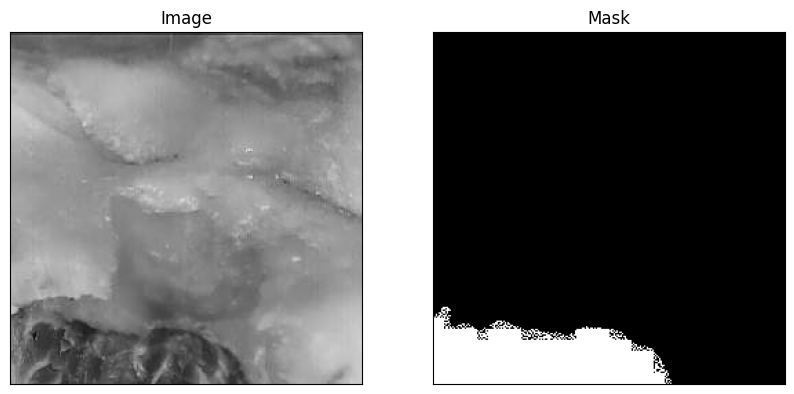

In [21]:
import random
import matplotlib.pyplot as plt

img_num = random.randint(0, filtered_images.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])


plt.show()

In [22]:
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

In [23]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)
    
    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

In [24]:
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

In [25]:
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [26]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [27]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)

In [28]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([2, 3, 1024, 1024])
original_sizes torch.Size([2, 2])
reshaped_input_sizes torch.Size([2, 2])
input_boxes torch.Size([2, 1, 4])
ground_truth_mask torch.Size([2, 256, 256])


In [ ]:
import os
import cv2
import numpy as np

# Define the paths to your folders
images_folder = r"F:\tooth-cavity-segmentation\data\train"
masks_folder = r"F:\tooth-cavity-segmentation\data\train_mask"

# Initialize empty lists to store image and mask arrays
image_arrays = []
mask_arrays = []

# Loop through all files in the images folder
for filename in os.listdir(images_folder):
  # Check if the file extension is JPG
  if filename.endswith(".jpg"):
    # Construct the full path to the image file
    image_path = os.path.join(images_folder, filename)
    
    # Load the image using OpenCV (BGR format)
    image = cv2.imread(image_path)
  
    # Check if image loaded successfully
    if image is not None:
      # Convert the image to RGB format (if needed)
      image_array = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image_arrays.append(image_array)
    else:
      print(f"Error: Failed to load image {filename}")

# Loop through all files in the masks folder (assuming same names as images)
for filename in os.listdir(masks_folder):
  # Check if the file extension is JPG (or modify for your mask format)
  if filename.endswith(".jpg"):
    # Construct the full path to the mask file (assuming same filename as image)
    mask_path = os.path.join(masks_folder, filename)
    
    # Load the mask (adjust loading method based on mask format)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Assuming grayscale masks

    # Check if mask loaded successfully
    if mask is not None:
      # Convert mask to NumPy array
      mask_array = np.asarray(mask)
      mask_arrays.append(mask_array)
    else:
      print(f"Error: Failed to load mask {filename}")

# Convert the lists to NumPy arrays (if needed)
image_arrays = np.array(image_arrays)
mask_arrays = np.array(mask_arrays)

# Print some information (optional)
print(f"Loaded {len(image_arrays)} images and {len(mask_arrays)} masks.")
print(f"Image array shape: {image_arrays.shape}")
print(f"Mask array shape: {mask_arrays.shape}")


Loaded 520 images and 520 masks.
Image array shape: (520, 1024, 1280)
Mask array shape: (520, 1024, 1280)


In [ ]:
from patchify import patchify

In [ ]:
patch_size = 256
step = 256

In [ ]:
all_img_patches = []
for img in range(image_arrays.shape[0]):
    image = image_arrays[img]
    patches_img = patchify(image, (patch_size,patch_size),step=step)
    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            single_patch_img = patches_img[i,j,:,:]
            all_img_patches.append(single_patch_img)
images = np.array(all_img_patches)

In [ ]:
all_mask_patches = []
for img in range(mask_arrays.shape[0]):
    mask = mask_arrays[img]
    patches_mask = patchify(mask, (patch_size,patch_size), step = step)
    for i in range(patches_mask.shape[0]):
        for j in range(patches_mask.shape[1]):
            single_patch_mask = patches_mask[i,j,:,:]
            single_patch_mask = (single_patch_mask/255.).astype(np.uint8)
            all_mask_patches.append(single_patch_mask)
            
    masks = np.array(all_mask_patches)

In [ ]:
images.shape

(10400, 256, 256)

In [ ]:
masks.shape

(10400, 256, 256)

In [ ]:
# Create a list to store the indices of non-empty masks
valid_indices = [i for i, mask in enumerate(masks) if mask.max() != 0]
# Filter the image and mask arrays to keep only the non-empty pairs
filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]
print("Image shape:", filtered_images.shape)  # e.g., (num_frames, height, width, num_channels)
print("Mask shape:", filtered_masks.shape)

Image shape: (2321, 256, 256)
Mask shape: (2321, 256, 256)


In [ ]:
from datasets import Dataset
from PIL import Image

dataset_dict = {
    "image":[Image.fromarray(img).convert("RGB") for img in filtered_images],
    "label":[Image.fromarray(img) for img in filtered_masks],
}


In [ ]:
dataset = Dataset.from_dict(dataset_dict)

In [ ]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 2321
})

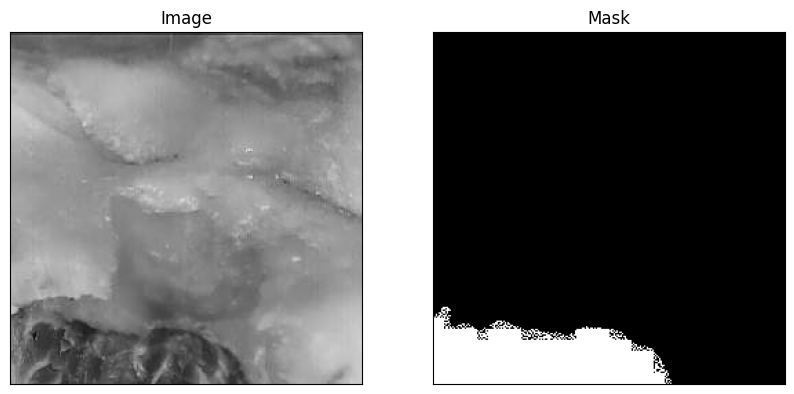

In [ ]:
import random
import matplotlib.pyplot as plt

img_num = random.randint(0, filtered_images.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])


plt.show()

In [ ]:
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

In [ ]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)
    
    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

In [ ]:
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

In [ ]:
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [ ]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)

In [29]:
batch["ground_truth_mask"].shape

torch.Size([2, 256, 256])

In [30]:
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [31]:
from torch.optim import Adam
import monai
# Initialize the optimizer and the loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [34]:
error = []
error.append(0.2564962076682607)

In [35]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

#Training loop
num_epochs = 10

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch+2}')
    print(f'Mean loss: {mean(epoch_losses)}')
    error.append(mean(epoch_losses))
    torch.save(model.state_dict(), f"./mito_model_checkpoint_{epoch+2}.pth")
    

  0%|          | 0/1161 [00:00<?, ?it/s]

100%|██████████| 1161/1161 [1:33:42<00:00,  4.84s/it]


EPOCH: 2
Mean loss: 0.2323451518505478


100%|██████████| 1161/1161 [1:34:02<00:00,  4.86s/it]


EPOCH: 3
Mean loss: 0.22364743519494187


100%|██████████| 1161/1161 [1:34:02<00:00,  4.86s/it]


EPOCH: 4
Mean loss: 0.21851635617456694


100%|██████████| 1161/1161 [1:33:59<00:00,  4.86s/it]


EPOCH: 5
Mean loss: 0.2130536020482336


100%|██████████| 1161/1161 [1:33:59<00:00,  4.86s/it]


EPOCH: 6
Mean loss: 0.20479225854066094


100%|██████████| 1161/1161 [1:33:49<00:00,  4.85s/it]


EPOCH: 7
Mean loss: 0.20254114418451794


 84%|████████▍ | 979/1161 [1:24:41<15:44,  5.19s/it]


MemoryError: Unable to allocate 24.0 MiB for an array with shape (1024, 1024, 3) and data type float64

In [33]:
torch.save(model.state_dict(), "./mito_model_checkpoint.pth")
     

In [ ]:
100%|██████████| 1161/1161 [1:40:17<00:00,  5.18s/it]
EPOCH: 0
Mean loss: 0.2564962076682607
0%|          | 0/1161 [00:00<?, ?it/s]
100%|██████████| 1161/1161 [1:33:42<00:00,  4.84s/it]
EPOCH: 2
Mean loss: 0.2323451518505478
100%|██████████| 1161/1161 [1:34:02<00:00,  4.86s/it]
EPOCH: 3
Mean loss: 0.22364743519494187
100%|██████████| 1161/1161 [1:34:02<00:00,  4.86s/it]
EPOCH: 4
Mean loss: 0.21851635617456694
100%|██████████| 1161/1161 [1:33:59<00:00,  4.86s/it]
EPOCH: 5
Mean loss: 0.2130536020482336
100%|██████████| 1161/1161 [1:33:59<00:00,  4.86s/it]
EPOCH: 6
Mean loss: 0.20479225854066094
100%|██████████| 1161/1161 [1:33:49<00:00,  4.85s/it]
EPOCH: 7
Mean loss: 0.20254114418451794
 84%|████████▍ | 979/1161 [1:24:41<15:44,  5.19s/it]
---------------------------------------------------------------------------
MemoryError                               Traceback (most recent call last)
Cell In[35], line 15